In [23]:
from dimension_magic import load_emg_data,get_glove_data,calculate_power_of_signal,custom_norm,fast_ica_analysis
from PlotUtility import plot_multi_channel
from MyKinFitter import MyoKinFitter

In [25]:
emg = load_emg_data()
emg_ica = fast_ica_analysis(emg)
emg_ica_power = calculate_power_of_signal(emg_ica)

In [ ]:
plot_multi_channel(emg_ica_power)

In [28]:
glove = get_glove_data()
glove = custom_norm(glove)
glove = glove[:emg_ica_power.shape[0]]
fingers = glove[:,[4,7,11,15]]
fingers_power = calculate_power_of_signal(fingers)
fingers_power = custom_norm(fingers_power)

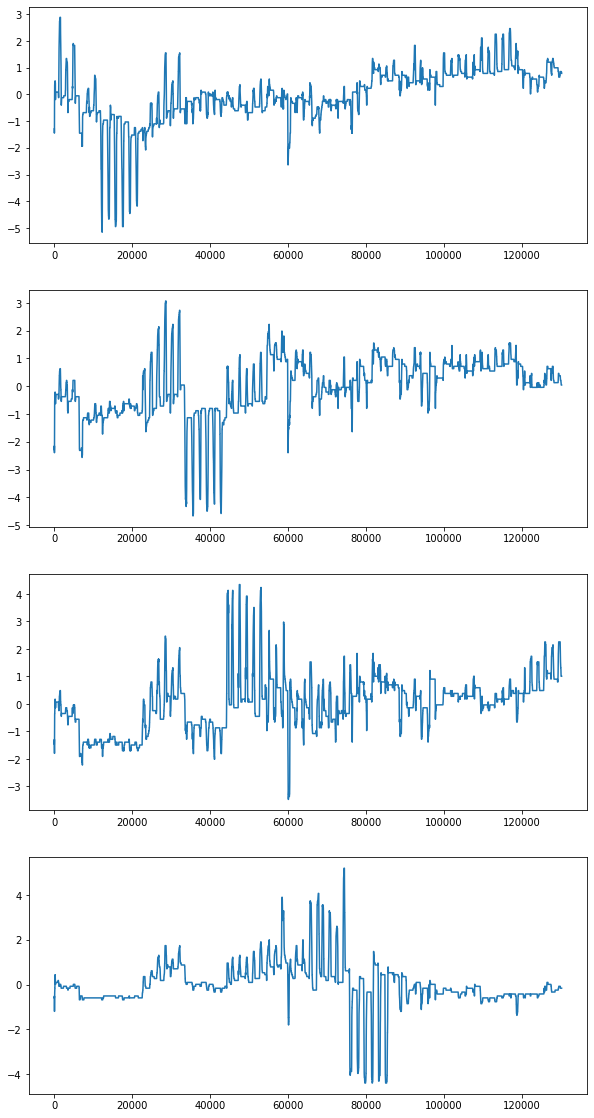

In [29]:
plot_multi_channel(fingers)

In [30]:
fitter = MyoKinFitter(fingers,fingers_power,emg_ica_power)
fitter.plot_correlation_coefficient_histogram_for_each_joint()
fitter.plot_best_fit_channels()
fitter.fit_mykin_model()
fitter.show_model_fit()